# **Inequality in NYC**

## **Introduction**
New York City consists of five boroughs: Manhattan, Queens, The Bronx, Brooklyn, and Staten Island. While New York City is known for wealth, booming industries, and job opportunities, there are also many individuals in many areas that struggle to live. According to The Center of [New York City Affairs](http://www.centernyc.org/inequality-poverty), approximately one in five New Yorkers lives in poverty and nearly half the city’s households are considered near poor.

New York City has always been known as a chronically tight, high-cost rental market. In recent decades, affordable housing and rent burden has skyrocketed. The 2018 [New York City Housing and Vacancy Survey](https://ny.curbed.com/2018/10/12/17965416/nyc-rent-burden-households-affordable-housing) showed that 44% of all New York households are **rent burdened**, defined as paying more than 30% of income toward rent. Rent burden is even more drastic for low-income households as 91% of severely rent-burdened households, defined as paying more than 50% of income on rent, are low-income New Yorkers.

In our report, we looked at data regarding housing, demographics, and education to analyze the intersections that produce inequality. Our data analysis shows that inequalities within New York City may be correlated with both race and location of residence (borough). How might have these trends come about?

**Redlining**, which began in the 1930s, refers to the racially discriminatory practice of denying home loans to borrowers in communities of color and poor communities based on perceived financial risk. Although redlining is no longer enforced, New York City has not escaped its pervasive history, as many neighborhoods that were affected still face economic and social hardship.

Our data shows that race still has a relationship with location of residence and subsequently, economic and educational inequalities. Through data analysis, a pattern emerges that indicates boroughs with higher levels racial minorities also tend to have a higher percent of rent burden and poverty. School funding, opportunities, and quality are directly impacted by the resources that its neighborhood provides -- these inequalities are intergenerational.

## **Research Questions**
- How does housing accessibility and rent burden differ across New York City's boroughs?
- How does housing policy and inequality extend to educational inequality in New York City?
- To what extent does racial and socioeconomic segregation in New York City shape its student's educational opportunities and outcomes?

In our project, we chose to look at multiple datasets to see these varying trends and answer different parts of our questions.


## **Pre-Registration of Analyses**
In our final report, we vow to present the following analyses:

#### Analysis One:
We will plot rent burdened (defined as paying >30% income level) by rent level for different neighborhoods grouped by borough to analyze if there is an association between rent level and being rent burdened. Especically given the economic downturn, we want to look at how housing insecurity has been exacerbated, especially for those already living in low income areas.

#### Analysis Two:
We will look at the type of relationship and correlation between rent burden and minority levels for each of the community districts and determine if there are any statistical differences.

#### Analysis Three:
We will analyze the relationship between racial composition of schools and housing insecurity at the neighborhood/borough level. We will look at multilinear regression model and analyze the individual regression coefficients of the our indicator variables to see how housing insecurity may change based on race. We looked at a line plot that compared our average rent burden percents by borough.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans

### **Analysis One**
First, we look at how rent burden differs across different boroughs.

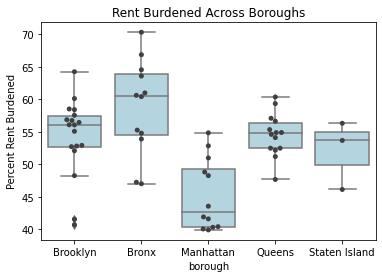

In [3]:
housing_poverty = pd.read_csv('housing_poverty.csv')
ax = sns.boxplot(x="borough", y="rent_burdened", data=housing_poverty, color = "lightblue")
ax = sns.swarmplot(x="borough", y="rent_burdened", data=housing_poverty, color=".25")
plt.ylabel("Percent Rent Burdened")
plt.title('Rent Burdened Across Boroughs')
plt.show()


In this cleaned dataset, we see the median percent of households that are under each division of rent burden by each borough in New York City. Across all boroughs, residents spend a very large amount of their income on rent. 

While the differences in rent burden between boroughs do not seem that jarring, one large difference we can tangibly tell is the median percentage of households rent burdened in the Bronx is approximately 62%, while Manhattan is around 43%. If we were also to compare [poverty levels](https://www1.nyc.gov/site/opportunity/poverty-in-nyc/data-tool.page) from the same time end - 2012, we see that Staten Island held the lowest poverty level at 13.4%, Manhattan the second lowest at 14.7%, Queens at 21.8%, Brooklyn at 22.3%, and the Bronx at 25.2%. 

We then analyzed if there was a statistically significant difference in the percentage of rent burdened households between Manhattan, a wealthier borough, and the Bronx, the poorest borough.

In [4]:
import scipy.stats as stats
ttest = stats.ttest_ind(housing_poverty['rent_burdened'][housing_poverty['borough'] == 'Bronx'],
                housing_poverty['rent_burdened'][housing_poverty['borough'] == 'Manhattan'])
print(ttest)

Ttest_indResult(statistic=5.102219651699485, pvalue=4.1146387254621086e-05)


Our t-test result indicates that the difference in the percentage of rent burdened households between the two boroughs is **statistically highly significant** as p < 0.001.

The comparisons between poverty and income show us that **neighborhoods that face higher poverty levels, may actually be more burdened by rent than their wealthier counterparts**. This demonstrates a discrepancy in the quality of life and wealth that can be accumulated across different boroughs.

Next, we look at how rent burden changes based on rent level, specifically based on percentage of households paying low rent, as well as poverty rate.

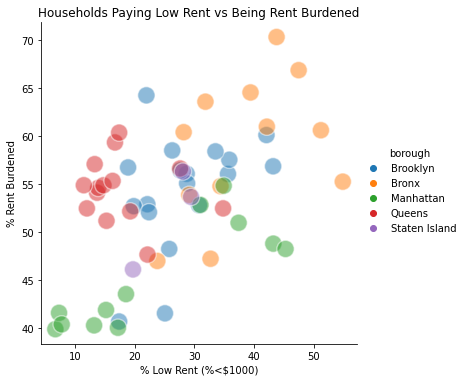

Overall correlation: 0.50


In [5]:
# display(burden_gross.head())

sns.relplot(x='low_rent', y='rent_burdened', hue="borough", s=300, alpha=.5, data=housing_poverty);
plt.xlabel("% Low Rent (%<$1000)")
plt.ylabel("% Rent Burdened")
plt.title('Households Paying Low Rent vs Being Rent Burdened')
plt.show()

print("Overall correlation: {:.2f}".format(housing_poverty["low_rent"].corr(housing_poverty["rent_burdened"])))

We want to determine if we can cluster these factors of low rent and being rent burdened to predict borough.

[[16.05714286 55.71428571]
 [45.29       59.25      ]
 [22.455      47.3875    ]
 [31.357      55.4195    ]
 [12.11285714 40.69285714]]


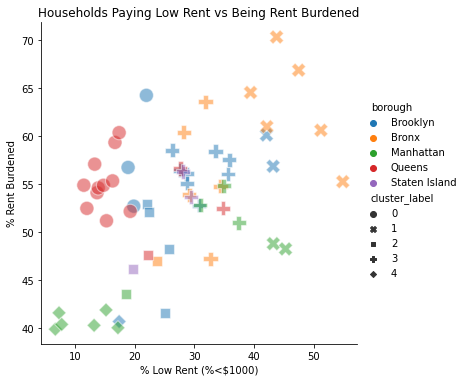

Percent of accurate boroughs:  20.3 %


In [42]:
clustering = KMeans(n_clusters = 5, random_state = 15)
clustering.fit(housing_poverty[["low_rent", "rent_burdened"]])
print(clustering.cluster_centers_)
cluster_labels = clustering.labels_
housing_poverty['cluster_label'] = cluster_labels


sns.relplot(x='low_rent', y='rent_burdened', hue="borough", style ='cluster_label', s=200, alpha=.5, data=housing_poverty);
plt.xlabel("% Low Rent (%<$1000)")
plt.ylabel("% Rent Burdened")
plt.title('Households Paying Low Rent vs Being Rent Burdened')
plt.show()


predicted_borough_lookup = pd.DataFrame({"cluster_label": [0, 1, 2,3,4],
                                        "predicted_borough": ["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten_Island"]})
borough_predict = pd.merge(predicted_borough_lookup, housing_poverty)
same = borough_predict.loc[borough_predict['predicted_borough'] == borough_predict['borough']]
total = len(borough_predict)
accurate = len(same)
accurate_boroughs = round((accurate/total)*100,1)
print("Percent of accurate boroughs: ",accurate_boroughs, "%")

Our clustering shows that there is some accuracy in using % rent burdened and % low rent (>$1000) to predict the different boroughs as the boroughs were predicted correctly about 20.3% of the time. It can also be seen that the model did a better job predicting some clusters than others as it appears that Staten Island is predicted fairly well.

Next, we compare households in poverty and being rent burdened by borough.

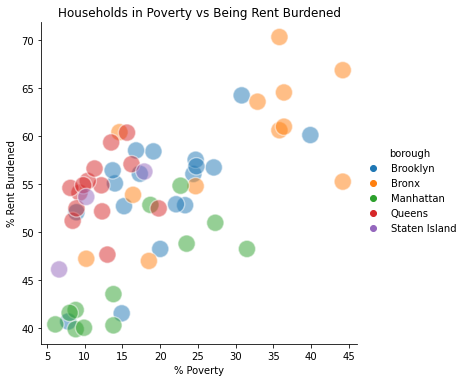

Overall correlation: 0.61


In [6]:
# display(burden_gross.head())

sns.relplot(x='poverty_rate', y='rent_burdened', hue="borough", s=300, alpha=.5, data=housing_poverty);
plt.xlabel("% Poverty")
plt.ylabel("% Rent Burdened")
plt.title('Households in Poverty vs Being Rent Burdened')
plt.show()

print("Overall correlation: {:.2f}".format(housing_poverty["poverty_rate"].corr(housing_poverty["rent_burdened"])))

In the scatterplot, the overall correlation is moderately positive, indicating that, across boroughs, households that pay lower rent and are more impoverished tend to be more rent burdened. This indicates that lower resource households have to pay a higher percentage of their income on rent, and still have less to spend on other areas of living. Data from the [US Census Bureau's Survey of Income and Program Participation](https://econofact.org/the-growing-burden-of-housing-for-low-income-renters#:~:text=Low%2Dincome%20renter%20households%20experience,burden%20is%20also%20more%20severe.) shows that **housing cost burden is associated with higher likelihood of experiencing material hardship, including food insecurity, difficulty paying bills, and difficulty affording medical care**.

We want to further our findings from this analysis and look at rent burden based on demographics for each of the boroughs and indicate the population level as well corresponding with the size of the points.

### **Analysis Two**: 
We will look at the type of relationship and correlation between rent burden and percentage of minorities for each of the community districts and determine if minority levels in an area can predict rent burden.

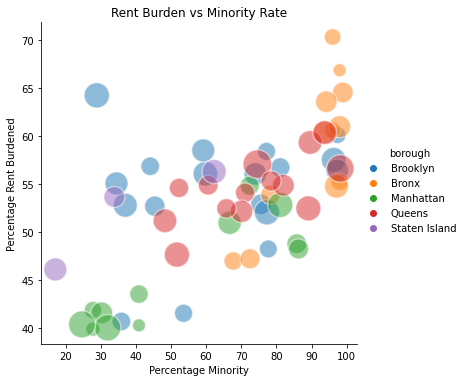

In [7]:
size = housing_poverty['population'].to_numpy()
sns.relplot(x='minority_rate', y='rent_burdened', hue="borough", s = size/300, alpha=.5, data=housing_poverty)
plt.xlabel("Percentage Minority")
plt.ylabel("Percentage Rent Burdened")
plt.title('Rent Burden vs Minority Rate')
plt.show()
# print("Overall correlation: {:.2f}".format(housing_poverty["minority_rate"].corr(housing_poverty["rent_burdened"])))

Next, we look at the fit and summary of our model through an **ordinary least square** model that minimizes the sum of the squares of the differences between the observed dependent variable and predicted dependent variable. 

In [8]:
import statsmodels.api as sm

X = housing_poverty['minority_rate']
Y = housing_poverty['rent_burdened']

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          rent_burdened   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              722.9
Date:                Wed, 12 May 2021   Prob (F-statistic):                    1.95e-34
Time:                        05:32:40   Log-Likelihood:                         -242.11
No. Observations:                  59   AIC:                                      486.2
Df Residuals:                      58   BIC:                                      488.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
minority_rate     0.7193      0.027     26.886      0.000       0.666       0.773
==============================================================================
Omnibus:                        4.155   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                4.074
Skew:                           0.616   Prob(JB):                        0.130
Kurtosis:                       2.627   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our data shows that for each one percentage point increase in minority composition, the percentage of households that are rent burdened increases by .7193. Our $r^2$ value of .926 indicates that our regression model fits our observations fairly accurately. Race still has an effect on housing affordability. While the **Fair Housing Act** was passed in 1968, redlining and discrimination in housing accessibility remains a major cause of inequality in the city today, not only through historical disinvestment in minority neighborhoods, but also through [modern day practices](https://www.americanprogress.org/issues/poverty/reports/2020/10/30/492606/pandemic-exacerbated-housing-instability-renters-color/) such as barring people with criminalized records from renting or obtaining housing vouchers and other discriminatory practices, such as landlords showing families of color fewer rental options. 

We're socialized to believe in educationn as an equalizing system in allowing more opportunities for future generations, but is this really true?

### **Analysis Three**:

Next, we analyze the relationship between racial composition of schools and housing insecurity at the neighborhood/borough level. We will look at multilinear regression model and analyze the individual regression coefficients of the our indicator variables to see how housing insecurity for students may change based on race. 

First, we look at the relationship betweenn race and student housing type.

In [32]:
final_ds = pd.read_csv('final_ds.csv')
print("Correlation between Asian and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[6], final_ds.corr().unstack()[7]))
print("Correlation between Black and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[14], final_ds.corr().unstack()[15]))
print("Correlation between Hispanic and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[22], final_ds.corr().unstack()[23]))
print("Correlation between White and % of students in temporary housing is {:.2f} and students in shelters is {:.2f}".format(final_ds.corr().unstack()[30], final_ds.corr().unstack()[31]))

Correlation between Asian and % of students in temporary housing is 0.38 and students in shelters is -0.52
Correlation between Black and % of students in temporary housing is 0.32 and students in shelters is 0.09
Correlation between Hispanic and % of students in temporary housing is -0.54 and students in shelters is -0.50
Correlation between White and % of students in temporary housing is 0.78 and students in shelters is -0.75


From these numbers, there is a correlation between race and students residing in temporary housing/residing in shelters. This shows a positive correlation with percentage of Black and Hispanic students with residing in temporary housing or in shelters. There was a negative correlation between the percentage of White and Asian students with residing in temporary housing or in shelters. 

We then form a hypothesis and look at our statistical measures.

**Null hypothesis**: There is no correlation between racial composition of schools and housing insecurity.

**Alternative hypothesis**: There is a correlation between ractial composition of schools and housing insecrurity - some races will show greater housing insecurity compared to other races

In [25]:
x = final_ds[["%_black", "%_hispanic", "%_asian", "%_white"]]
y = final_ds["%_students_in_temporary_housing"]

#ANOVA model 
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     %_students_in_temporary_housing   R-squared (uncentered):                   0.968
Model:                                         OLS   Adj. R-squared (uncentered):              0.963
Method:                              Least Squares   F-statistic:                              210.5
Date:                             Wed, 12 May 2021   Prob (F-statistic):                    1.86e-20
Time:                                     11:00:13   Log-Likelihood:                         -72.400
No. Observations:                               32   AIC:                                      152.8
Df Residuals:                                   28   BIC:                                      158.7
Df Model:                                        4                                                  
Covariance Type:                         nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
%_black        0.1481      0.014     10.906      0.000       0.120       0.176
%_hispanic     0.1982      0.013     15.465      0.000       0.172       0.225
%_asian       -0.0221      0.036     -0.618      0.542      -0.096       0.051
%_white       -0.0686      0.043     -1.580      0.125      -0.158       0.020
==============================================================================
Omnibus:                        1.982   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.182
Skew:                          -0.105   Prob(JB):                        0.554
Kurtosis:                       2.082   Cond. No.                         6.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It is clear that there is a relationship between race and student housing - is there a relationship between racial composition of schools and the percenntage of students in poverty? We chose to look at scatterplots comparing race and poverty within our schools.

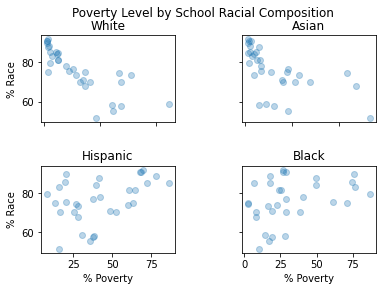

White correlation -0.80
Asian correlation -0.60
Hispanic correlation 0.42
Black correlation 0.36


In [26]:
fig, axs = plt.subplots(2,2)
fig.suptitle('Poverty Level by School Racial Composition')

axs[0, 0].scatter(final_ds["%_white"],final_ds["%_poverty"],alpha = 0.3)
axs[0, 0].set_title('White')
axs[0, 1].scatter(final_ds["%_asian"],final_ds["%_poverty"],alpha = 0.3)
axs[0, 1].set_title('Asian')
axs[1, 0].scatter(final_ds["%_hispanic"],final_ds["%_poverty"],alpha = 0.3)
axs[1, 0].set_title('Hispanic')
axs[1, 1].scatter(final_ds["%_black"],final_ds["%_poverty"],alpha = 0.3)
axs[1, 1].set_title('Black')

plt.subplots_adjust(wspace=0.50, hspace=.5)

for ax in axs.flat:
    ax.set(xlabel='% Poverty', ylabel='% Race')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

print("White correlation {:.2f}".format(final_ds["%_white"].corr(final_ds["%_poverty"])))
print("Asian correlation {:.2f}".format(final_ds["%_asian"].corr(final_ds["%_poverty"])))
print("Hispanic correlation {:.2f}".format(final_ds["%_hispanic"].corr(final_ds["%_poverty"])))
print("Black correlation {:.2f}".format(final_ds["%_black"].corr(final_ds["%_poverty"])))

Our correlation and scatterplots show us that as the percentage of White and Asian students in a school increase, the percentage of poverty decreases. The inverse is true for underrepresented minorities - Hispanic and Black students.

We want to look at if the percentage of underrepresented minorities can predict academic outcomes (in our case, specifically Math and ELA profifiency for incoming 4th graders). We used a **multivariable regression model** to calculate a coefficient that takes location into account.

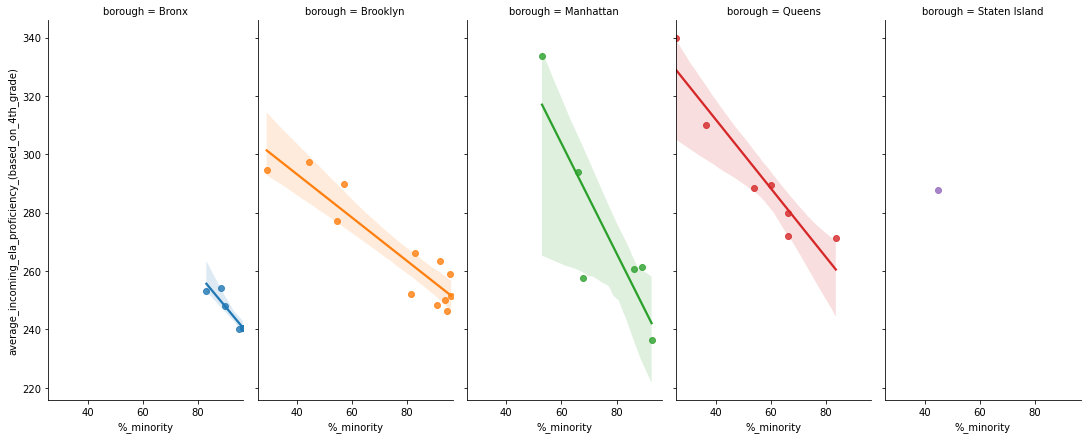

ELA Coefficient: -1.0
ELA Rsquared: 0.82


In [55]:
sns.lmplot(x='%_minority', y='average_incoming_ela_proficiency_(based_on_4th_grade)', hue ='borough',col='borough',
               data=final_ds, height=6, aspect=.5)

plt.show()

# indicator variables
final_ds_copy = final_ds.copy()
final_ds_copy['is_brooklyn'] = pd.get_dummies(final_ds_copy['borough'])['Brooklyn']
final_ds_copy['is_bronx'] = pd.get_dummies(final_ds_copy['borough'])['Bronx']
final_ds_copy['is_manhattan'] = pd.get_dummies(final_ds_copy['borough'])['Manhattan']
final_ds_copy['is_queens'] = pd.get_dummies(final_ds_copy['borough'])['Queens']
final_ds_copy['is_staten'] = pd.get_dummies(final_ds_copy['borough'])['Staten Island']

# mutlivariable linear regression

multi_model = LinearRegression()
multi_model.fit(final_ds_copy[['%_minority','is_brooklyn', 'is_bronx', 'is_manhattan', 'is_queens', 'is_staten']], final_ds_copy['average_incoming_ela_proficiency_(based_on_4th_grade)'])
print('ELA Coefficient:', round(multi_model.coef_[0],2))
r_sq = multi_model.score(final_ds_copy[['%_minority','is_brooklyn', 'is_bronx', 'is_manhattan', 'is_queens', 'is_staten']], final_ds_copy['average_incoming_ela_proficiency_(based_on_4th_grade)'])
print('ELA Rsquared:', round(r_sq,2)) 

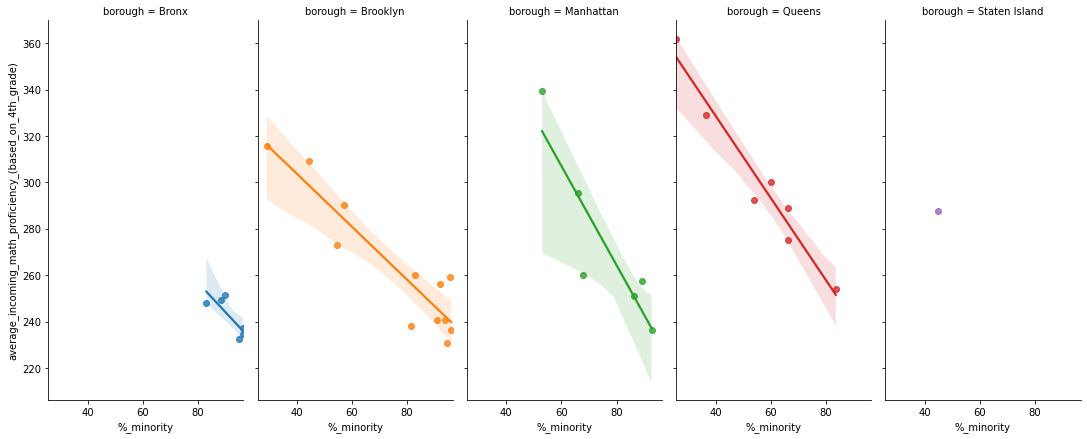

Math Coefficient: -1.42
Math Rsquared: 0.87


In [56]:
sns.lmplot(x='%_minority', y='average_incoming_math_proficiency_(based_on_4th_grade)', hue ='borough',col='borough',
               data=final_ds, height=6, aspect=.5)

plt.show()

# indicator variables
# final_ds_copy = final_ds.copy()
# final_ds_copy['is_brooklyn'] = pd.get_dummies(final_ds_copy['borough'])['Brooklyn']
# final_ds_copy['is_bronx'] = pd.get_dummies(final_ds_copy['borough'])['Bronx']
# final_ds_copy['is_manhattan'] = pd.get_dummies(final_ds_copy['borough'])['Manhattan']
# final_ds_copy['is_queens'] = pd.get_dummies(final_ds_copy['borough'])['Queens']
# final_ds_copy['is_staten'] = pd.get_dummies(final_ds_copy['borough'])['Staten Island']

# mutlivariable linear regression

multi_model = LinearRegression()
multi_model.fit(final_ds_copy[['%_minority','is_brooklyn', 'is_bronx', 'is_manhattan', 'is_queens', 'is_staten']], final_ds_copy['average_incoming_math_proficiency_(based_on_4th_grade)'])

print('Math Coefficient:', round(multi_model.coef_[0],2))
r_sq = multi_model.score(final_ds_copy[['%_minority','is_brooklyn', 'is_bronx', 'is_manhattan', 'is_queens', 'is_staten']], final_ds_copy['average_incoming_math_proficiency_(based_on_4th_grade)'])
print('Math Rsquared:', round(r_sq,2)) 

Our data shows that for both Mathematics and ELA scores, as the percent of minorities increase in a school, average scores decrease. ELA scores decrease by 1.0 and Math scores decrease by an even greater 1.42 for each one percentage point increase in underrepresented minorities.

New York City public schools follow a [strict zoning admissions policy](https://medium.com/@nanako.chung/inequality-in-new-york-city-public-education-1d6d2263e1ac) in which one is not permitted to apply or attend a school outside the zone that that person lives in. Since zones are closely related with the layout of neighborhoods, **it is critical to note that the quality and financial funding of schools differ greatly by location**.

Furthermore, schools with [Gifted and Talented programs](https://www.schools.nyc.gov/enrollment/enroll-grade-by-grade/gifted-and-talented) are also hard to find within historically redlined areas. If the programs are near a historically redlined area, they're invariably on its borders. Staten Island, with a population of almost 500,000 people, has 8 schools with Gifted and Talented programs, and the population is 62.6% White. The Bronx, with a population of almost 1,500,000 people also has 8 schools with Gifted and Talented programs, despite having 3 times the population of Staten Island, and the population is 9.6% White.

## Conlusion

We have found that inequality in New York City lies at the intersection of race and location of residence that highly determines of access to quality education and affordable housing. 

When comparing the racial breakdown of a school to the percent of students in poverty, we see that schools that have a high percentage of Black or Hispanic students there is also a high percentage of students living in poverty. 

These findings conclude that racial composition of a school can have an impact on the educational outcomes of the school as there is less circular monetary flow in these areas. The schools who have a lower percentage of White and Asian students tend to have higher levels of poverty, which causes a lower school budget and access to less resources. This can have a multigenerational effect on Black and Hispanic families that don't have access to education and not as many resources to further their education in college. This issue perpetuates through generations causing greater economic disparity that can be seen through larger amounts of Black and Hispanic students living in poverty. This issue disportionately affecting Black and Hispanic families is not a coincidence is likely a product of redlining, and its discriminatory practices. 

New York consists of five boroughs: Manhattan, Brooklyn, Bronx, Queens, and Staten Island, and between these boroughs lies different levels of inequalities.  When looking at the percent of houses with a rent burden greater than 35% it becomes clear that the Bronx (50%) have a much more houses facing rent burden than those in Manhattan (35%). Furthermore, there is some clustering occurring when correlating poverty rate and percent of rent burden and comparing it to the boroughs. This comparison shows that most of the areas that face high poverty and high rent burden are in the Bronx with a few neighborhoods from Brooklyn facing this as well. Meanwhile, there is a cluster of neighborhoods from Manhattan that have low rent burden and low levels of poverty, which is a stark contrast from the neighborhoods in the Bronx. Additionally, throughout all five boroughs there appears to be a connection between the percentages of minorities in the area and the percentage of rent burden. As the percent of minorities increases, so does the rent burden resulting in a strong positive correlation between the two variables with a correlation coefficient of 0.7193. In neighborhoods with a large percent of minorities (90% - 100% ) most rent burden is above 50% with some neighborhoods having close to 70% rent burden. There is no clear clustering of the boroughs, except that there is a small cluster of Manhattan neighborhoods with low minority percentage and low rent burden percentage, and there is a small cluster of Bronx neighborhoods with a high minority percentage and high percent of rent burden. 

The discrepancies between the boroughs can is largely the result of a deeper more systematic issue. In the Bronx, unfinished housing projects in the depression and a rise of crime in the 60s and 70s resulted in white flight from the area. Many of the better off families who had the resources to leave did so, and left the Bronx in greater economic despair. Throughout the next few generations the Bronx has continued to suffer through greater rates of rent burden and poverty compared to other boroughs such as Manhattan and Staten Island. 
After performing analyses comparing total school population with percent of students in temporary housing per borough, the results were inconclusive as there were varying negative and positive correlations between the boroughs. Therefore, there was no clear connection between school size and temporary housing, so this data was not included in further analysis.  In a future analysis, to gain a deeper understanding of  inequalities among schools based on location and racial composition, a dataset with standardized testing would be a good representation of education outcomes. Standardized testing results can be used to draw conclusions about how the  quality of education may differ between boroughs and schools with a higher percentage of minorities. 

**Although inequality is a deeply ingrained into systems and policies in New York City, learning about the complexities of inequalities from historical discrimination to understand how we can move forward is the first step to taking action and aiming for a better quality of life for New York City residents**.



## Limitations

There are many intersections to inequality that we do not address in or data analysis - gender, sexuality, immigration, and much more that we did not include. We chose to look at race and location as it ties most directly back to historical and modern day practices of residental segregation.

Furthermore, our data is limited in that some parts only look at a point in time, while others look at five year estimates. We did not get the chance to look at these trends over long periods of time and compare time periods. 

Our education data only looks at elementary school outcomes, which does not give us a holisitc view of disparities in educational opportunity.

Our data is also pre-pandemic - [research](https://www.bloomberg.com/news/articles/2021-02-24/the-unequal-pandemic-in-nyc) has shown that the **pandemic has only deepened inequity among class and racial lines**. “*A return to normal is actually a return to a city with widespread economic insecurity and deep inequities along racial and ethnic lines that are fueled by structural racism and discrimination*,” said Sophie Collyer, Columbia’s Center on Poverty and Social Policy research director. “*What we are seeing since the pandemic, is that these disparities have only been exacerbated.*”

## Acknowlegements

We want to thank Professor Wilkens and the course staff for allowing us to have flexibility and freedom with our final project, but also equipping us with the tools and support we needed throughout the semester to make our project possible.


## Repository (all data cleaning and exploration)
https://github.com/cailtyn-caj96/info-2950